#Análise de Desempenho Escolar com Python

Este projeto foi criado com base nos conhecimentos adquiridos na faculdade, aplicando estatística e Python para explorar um conjunto de dados de desempenho estudantil.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("StudentsPerformance.csv")

##Análise estatística das notas

Aqui calculamos a média, mediana e o desvio padrão das notas dos estudantes em matemática, leitura e escrita.

In [ ]:
# Matemática
media_math = df["math score"].mean()
mediana_math = df["math score"].median()
desvio_math = df["math score"].std()

# Leitura
media_reading = df["reading score"].mean()
mediana_reading = df["reading score"].median()
desvio_reading = df["reading score"].std()

# Escrita
media_writing = df["writing score"].mean()
mediana_writing = df["writing score"].median()
desvio_writing = df["writing score"].std()

# Print dos resultados
print(f"""Média das notas:
      - Matemática: {media_math: .2f} pontos.
      - Leitura: {media_reading: .2f} pontos.
      - Escrita: {media_writing: .2f} pontos.\n""")

print(f"""Mediana das notas:
      - Matemática: {mediana_math: .2f} pontos.
      - Leitura: {mediana_reading: .2f} pontos.
      - Escrita: {mediana_writing: .2f} pontos.\n""")

print(f"""Desvio Padrão das notas:
      - Matemática: {desvio_math: .2f} pontos.
      - Leitura: {desvio_reading: .2f} pontos.
      - Escrita: {desvio_writing: .2f} pontos. """)

Média das notas:
      - Matemática:  66.09 pontos.
      - Leitura:  69.17 pontos.
      - Escrita:  68.05 pontos.

Mediana das notas:
      - Matemática:  66.00 pontos.
      - Leitura:  70.00 pontos.
      - Escrita:  69.00 pontos.

Desvio Padrão das notas:
      - Matemática:  15.16 pontos.
      - Leitura:  14.60 pontos.
      - Escrita:  15.20 pontos. 


##Gráfico: média das notas por disciplina

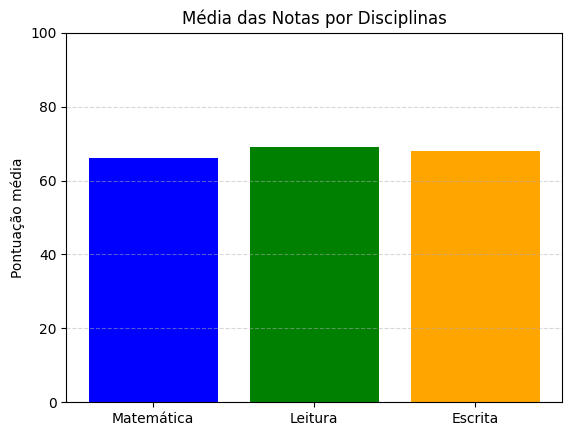

In [ ]:
disciplinas = ["Matemática", "Leitura", "Escrita"]
medias = [media_math , media_reading, media_writing]

plt.bar(disciplinas, medias, color=["blue", "green", "orange"])
plt.title("Média das Notas por Disciplinas")
plt.ylabel("Pontuação média")
plt.ylim(0,100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

##Comparação de desempenho por gênero

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


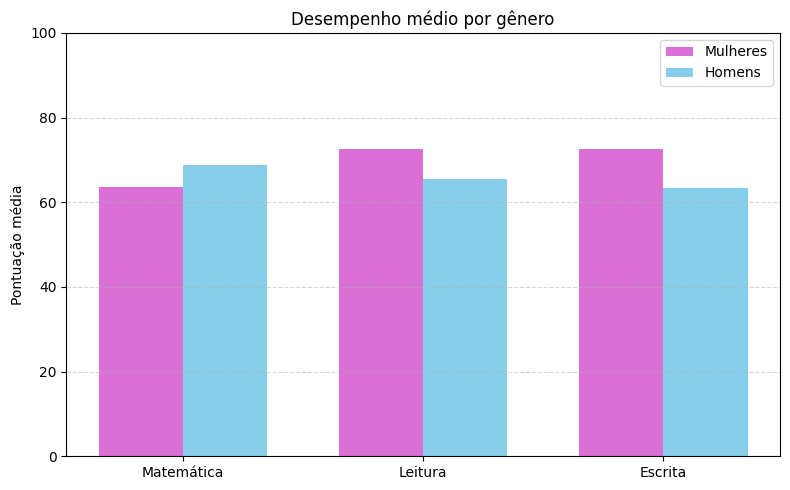

In [ ]:
desempenho_genero = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()
print(desempenho_genero)

media_mulheres = [
    desempenho_genero.loc["female", "math score"],
    desempenho_genero.loc["female", "reading score"],
    desempenho_genero.loc["female", "writing score"]
]

media_homens = [
    desempenho_genero.loc["male", "math score"],
    desempenho_genero.loc["male", "reading score"],
    desempenho_genero.loc["male", "writing score"]
]

x = np.arange(len(disciplinas))
largura = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - largura/2, media_mulheres, width=largura, label="Mulheres", color="orchid")
plt.bar(x + largura/2, media_homens, width=largura, label="Homens", color="skyblue")

plt.xticks(x, disciplinas)
plt.title("Desempenho médio por gênero")
plt.ylabel("Pontuação média")
plt.ylim(0, 100)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##Desempenho por curso preparatório

Comparação entre alunos que completaram ou não o curso preparatório.

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


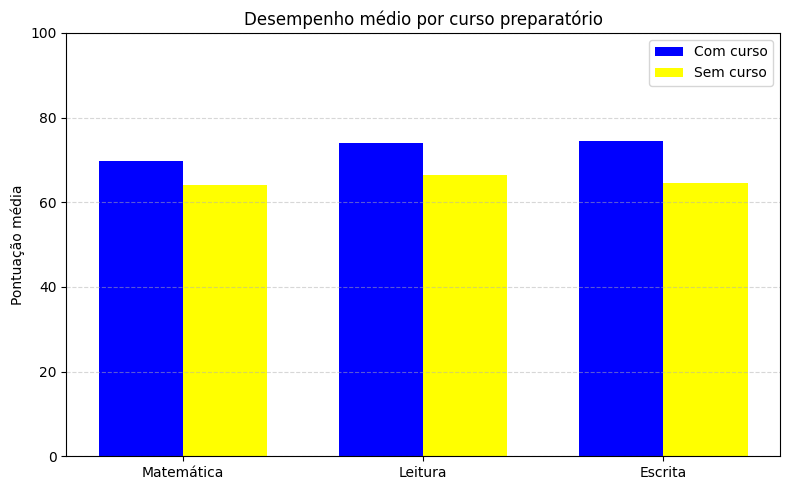

In [ ]:
preparacao = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
print(preparacao)

media_com_curso = [
    preparacao.loc["completed", "math score"],
    preparacao.loc["completed", "reading score"],
    preparacao.loc["completed", "writing score"]
]
media_sem_curso = [
    preparacao.loc["none", "math score"],
    preparacao.loc["none", "reading score"],
    preparacao.loc["none", "writing score"]
]

plt.figure(figsize=(8,5))
plt.bar(x - largura/2, media_com_curso, width=largura, label="Com curso", color="blue")
plt.bar(x + largura/2, media_sem_curso, width=largura, label="Sem curso", color="yellow")

plt.xticks(x, disciplinas)
plt.title("Desempenho médio por curso preparatório")
plt.ylabel("Pontuação média")
plt.ylim(0, 100)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##Correlação entre disciplinas

Avaliação da relação entre as notas de matemática, leitura e escrita.

In [ ]:
correlacao = df[["math score", "reading score", "writing score"]].corr()
print(correlacao)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


##Influência da escolaridade dos pais no desempenho

Nesta etapa, analisamos se o nível de escolaridade dos pais afeta as notas dos estudantes em matemática, leitura e escrita.

In [ ]:
escolaridade = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()
print(escolaridade)

                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


###Média de matemática por escolaridade dos pais

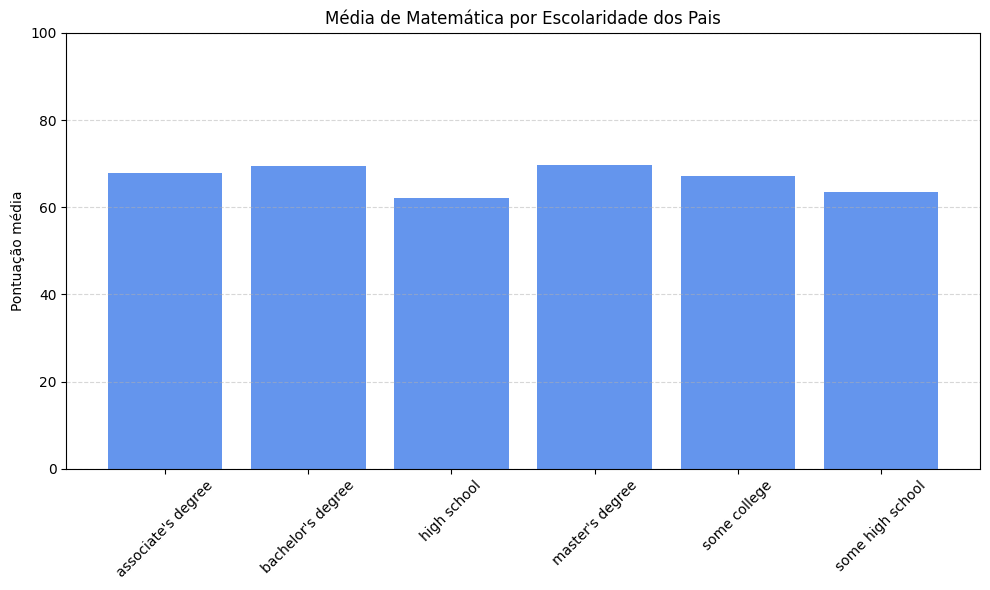

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(escolaridade.index, escolaridade["math score"], color="cornflowerblue")
plt.title("Média de Matemática por Escolaridade dos Pais")
plt.ylabel("Pontuação média")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

###Média de Leitura por Escolaridade dos Pais

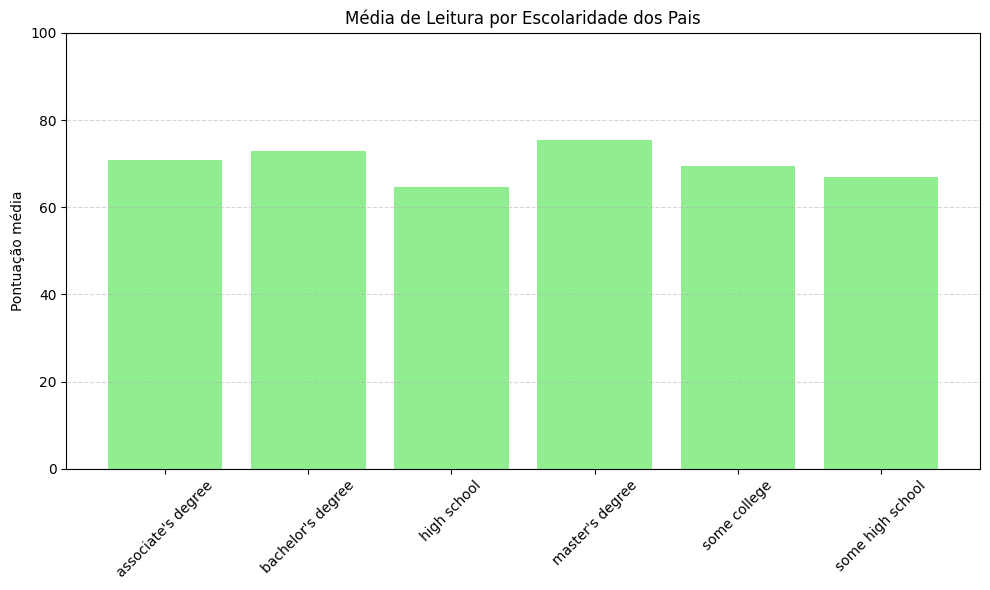

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(escolaridade.index, escolaridade["reading score"], color="lightgreen")
plt.title("Média de Leitura por Escolaridade dos Pais")
plt.ylabel("Pontuação média")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

###Média de Escrita por Escolaridade dos Pais

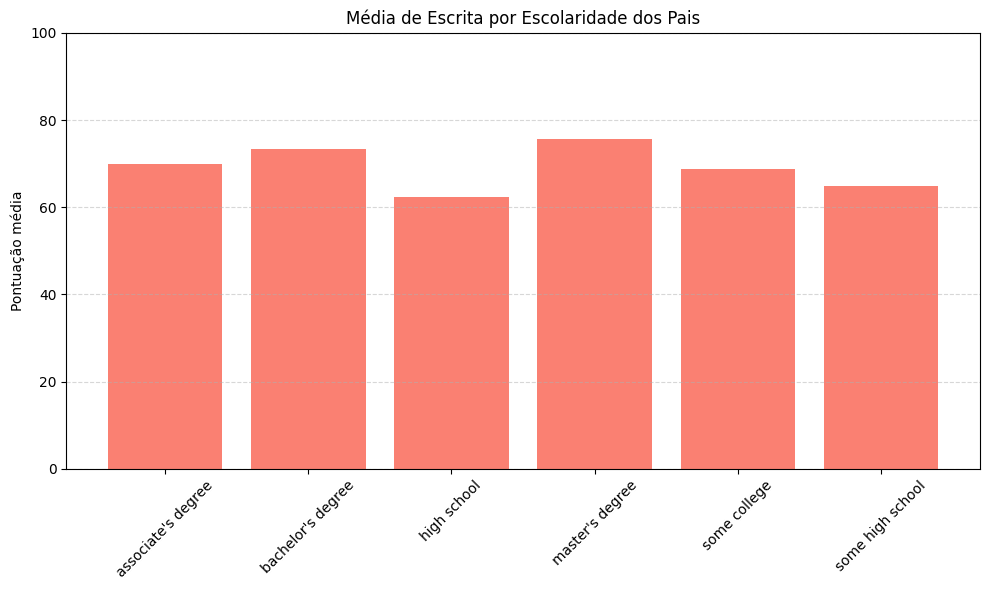

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(escolaridade.index, escolaridade["writing score"], color="salmon")
plt.title("Média de Escrita por Escolaridade dos Pais")
plt.ylabel("Pontuação média")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##Desempenho por tipo de almoço

Nesta etapa, analisamos se o tipo de almoço fornecido aos alunos (padrão ou reduzido) tem alguma influência nas notas de matemática, leitura e escrita.

In [ ]:
almoço = df.groupby("lunch")[["math score", "reading score", "writing score"]].mean()
print(almoço)

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


###Média de Matemática por tipo de almoço

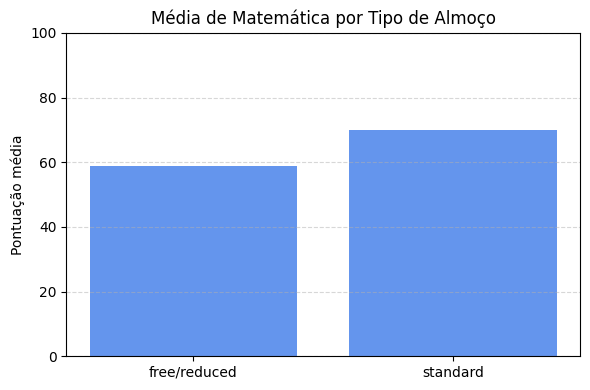

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(almoço.index, almoço["math score"], color="cornflowerblue")
plt.title("Média de Matemática por Tipo de Almoço")
plt.ylabel("Pontuação média")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

###Média de Leitura por tipo de almoço

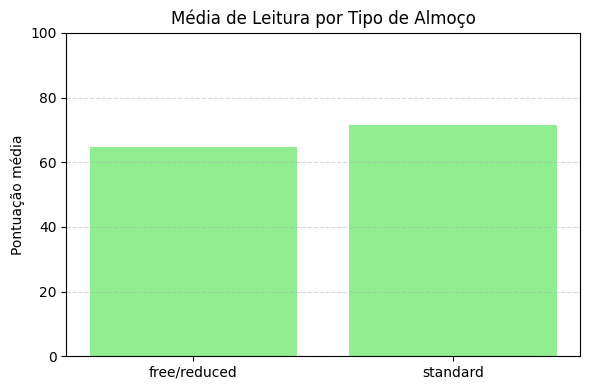

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(almoço.index, almoço["reading score"], color="lightgreen")
plt.title("Média de Leitura por Tipo de Almoço")
plt.ylabel("Pontuação média")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

###Média de Escrita por tipo de almoço

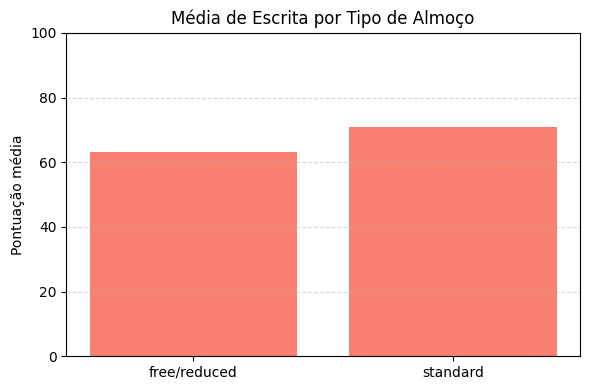

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(almoço.index, almoço["writing score"], color="salmon")
plt.title("Média de Escrita por Tipo de Almoço")
plt.ylabel("Pontuação média")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##Desempenho por grupo étnico

Aqui avaliamos se há variações nas médias de notas entre os diferentes grupos étnicos cadastrados no dataset.

In [ ]:
etnia = df.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].mean()
print(etnia)


                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


### Média de Matemática por grupo étnico

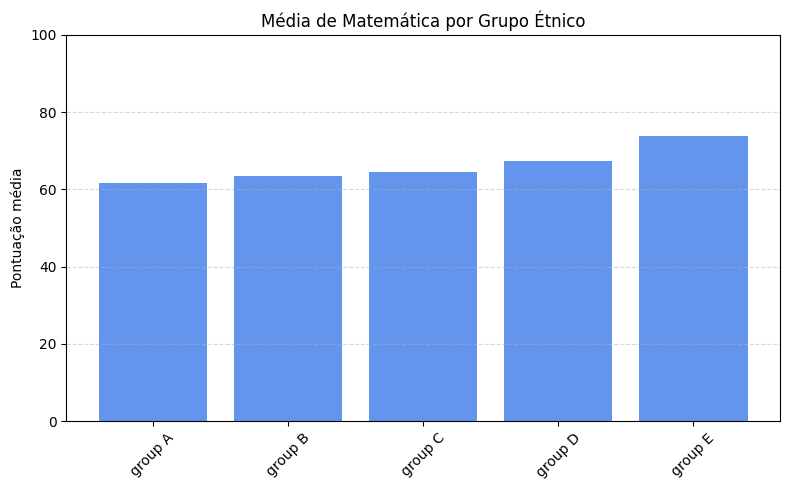

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(etnia.index, etnia["math score"], color="cornflowerblue")
plt.title("Média de Matemática por Grupo Étnico")
plt.ylabel("Pontuação média")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

###Média de Leitura por grupo étnico

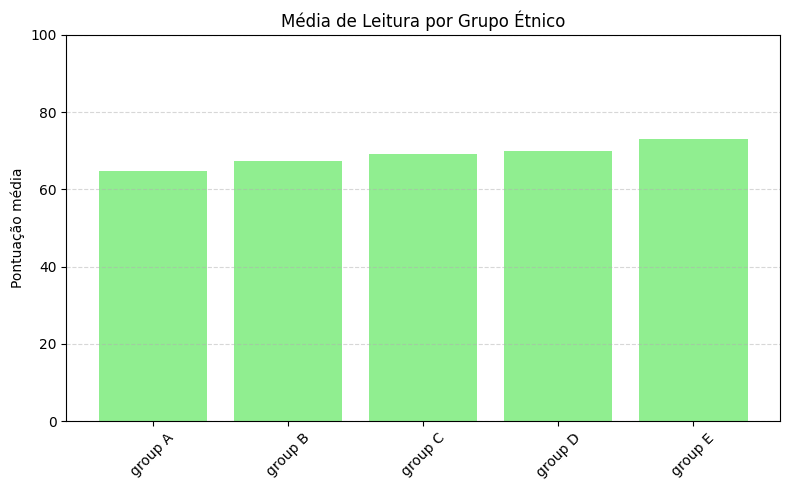

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(etnia.index, etnia["reading score"], color="lightgreen")
plt.title("Média de Leitura por Grupo Étnico")
plt.ylabel("Pontuação média")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Média de Escrita por grupo étnico

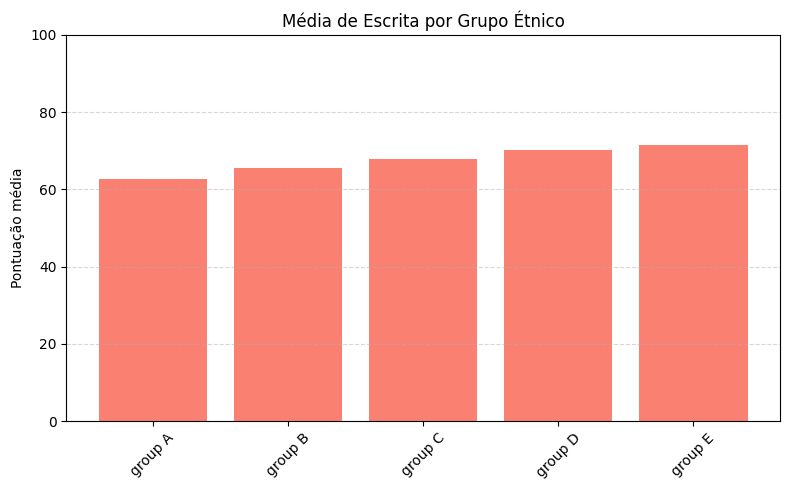

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(etnia.index, etnia["writing score"], color="salmon")
plt.title("Média de Escrita por Grupo Étnico")
plt.ylabel("Pontuação média")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## ✅ Conclusão Final

Este projeto teve como objetivo analisar o desempenho escolar de estudantes com base em fatores como gênero, curso preparatório, escolaridade dos pais, tipo de almoço e grupo étnico. Através de estatísticas descritivas e visualizações com Python, foi possível identificar padrões relevantes:

- Mulheres se destacaram em leitura e escrita, enquanto homens tiveram desempenho levemente superior em matemática.
- O curso preparatório teve impacto positivo em todas as disciplinas.
- Estudantes com pais mais escolarizados apresentaram melhores resultados, especialmente em leitura e escrita.
- O tipo de almoço também mostrou influência no desempenho, sugerindo relação com fatores socioeconômicos.
- O grupo E apresentou desempenho superior nas três disciplinas em relação aos demais grupos étnicos.
- Leitura e escrita apresentaram forte correlação (0.95), indicando dependência entre essas habilidades.

Este projeto representou a aplicação prática dos conhecimentos adquiridos em aula e foi fundamental para consolidar meu aprendizado em análise de dados com Python. Ele marca o início da minha trajetória em ciência de dados e servirá como base para projetos mais avançados.

*Nota: O dataset utilizado é público e fictício, e os resultados não devem ser generalizados para situações reais.*